In [19]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

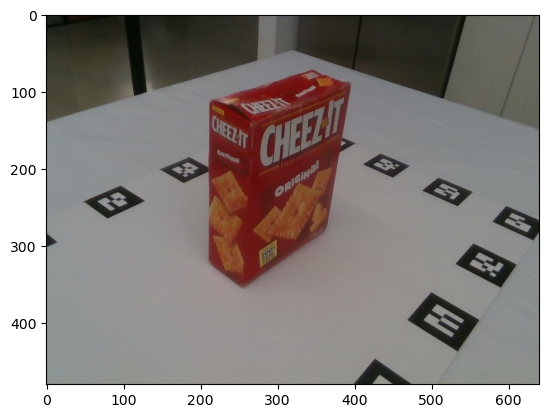

In [21]:
im = cv2.imread('cracker_box.jpg')
plt.imshow(im[:, :, (2, 1, 0)])

In [29]:
kernel = cv2.getGaussianKernel(15, 1)
print(kernel)
print(kernel.shape)

[[9.13472036e-12]
 [6.07588282e-09]
 [1.48671951e-06]
 [1.33830225e-04]
 [4.43184839e-03]
 [5.39909662e-02]
 [2.41970723e-01]
 [3.98942278e-01]
 [2.41970723e-01]
 [5.39909662e-02]
 [4.43184839e-03]
 [1.33830225e-04]
 [1.48671951e-06]
 [6.07588282e-09]
 [9.13472036e-12]]
(15, 1)


In [30]:
kernel_2D = kernel*kernel.T
print(kernel_2D)
print(kernel_2D.shape)

[[8.34431160e-23 5.55014905e-20 1.35807669e-17 1.22250168e-15
  4.04836957e-14 4.93192378e-13 2.21033489e-12 3.64422615e-12
  2.21033489e-12 4.93192378e-13 4.04836957e-14 1.22250168e-15
  1.35807669e-17 5.55014905e-20 8.34431160e-23]
 [5.55014905e-20 3.69163520e-17 9.03313351e-15 8.13136765e-13
  2.69273915e-11 3.28042784e-10 1.47018576e-09 2.42392653e-09
  1.47018576e-09 3.28042784e-10 2.69273915e-11 8.13136765e-13
  9.03313351e-15 3.69163520e-17 5.55014905e-20]
 [1.35807669e-17 9.03313351e-15 2.21033489e-12 1.98968006e-10
  6.58891545e-09 8.02694227e-08 3.59742594e-07 5.93115267e-07
  3.59742594e-07 8.02694227e-08 6.58891545e-09 1.98968006e-10
  2.21033489e-12 9.03313351e-15 1.35807669e-17]
 [1.22250168e-15 8.13136765e-13 1.98968006e-10 1.79105291e-08
  5.93115267e-07 7.22562316e-06 3.23829963e-05 5.33905349e-05
  3.23829963e-05 7.22562316e-06 5.93115267e-07 1.79105291e-08
  1.98968006e-10 8.13136765e-13 1.22250168e-15]
 [4.04836957e-14 2.69273915e-11 6.58891545e-09 5.93115267e-07
  

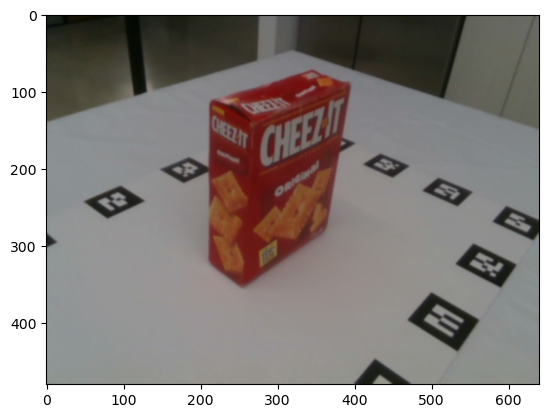

In [31]:
dst = cv2.filter2D(im, -1, kernel_2D)
plt.imshow(dst[:, :, (2, 1, 0)])

In [35]:
blur = cv2.GaussianBlur(im, (51,51),0)

(480, 640, 3)


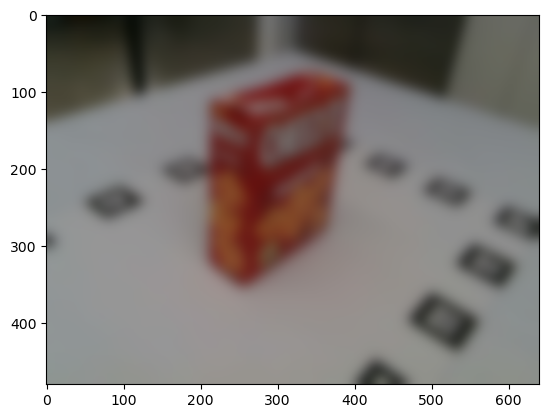

In [36]:
plt.imshow(blur[:, :, (2, 1, 0)])
print(im.shape)

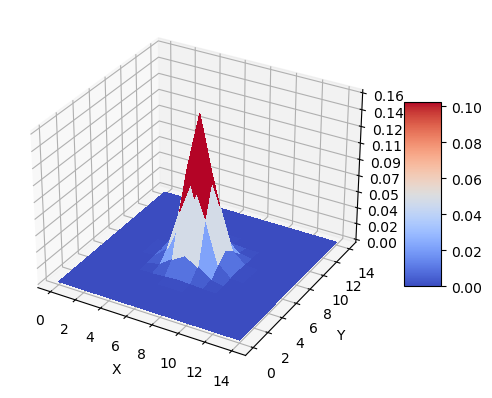

In [26]:
kernel = cv2.getGaussianKernel(15, 1)
kernel_2D = kernel*kernel.T
height = kernel_2D.shape[0]
width = kernel_2D.shape[1]

# Make data.
X = np.arange(0, width)
Y = np.arange(0, height)
X, Y = np.meshgrid(X, Y)
Z = kernel_2D

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()